## Title: Predicting Healthy Life Expectancy with GDP per Capita Using KNN Regression

## Introduction
The World Happiness Report is published annually by the United Nations Sustainable Solutions Network; it consists of self-surveys conducted by Gallup and economic data. Factors that have been correlated with higher quality of life are scored and then calculated to evaluate the “Happiness score” of each country. Healthy Life Expectancy (HALE) is one of these factors. HALE is defined by The World Health Organization (WHO)  as, “the average number of years that a person can expect to live in "full health" by taking into account years lived in less than full health due to disease and/or injury”, The added dimension of  health status to life expectancy can give perspective on the need for social, and medical supports in the future and subsequent costs. Our dataset contains data from 2019. Starting from the assumption that there will be a positive association between certain factors and HALE, we will try to answer if certain factors can be used to predict HALE.  

## Preliminary exploratory data analysis

In [11]:
library(repr)
library(tidyverse)
library(tidymodels)
options(repr.matrix.max.rows = 6)

In [12]:
# read data from the web
happiness <- read_csv("https://raw.githubusercontent.com/jocelyn1031/group_26/main/2019.csv")
happiness

Parsed with column specification:
cols(
  `Overall rank` = col_double(),
  `Country or region` = col_character(),
  Score = col_double(),
  `GDP per capita` = col_double(),
  `Social support` = col_double(),
  `Healthy life expectancy` = col_double(),
  `Freedom to make life choices` = col_double(),
  Generosity = col_double(),
  `Perceptions of corruption` = col_double()
)



Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035
156,South Sudan,2.853,0.306,0.575,0.295,0.010,0.202,0.091


In [13]:
# since the column names contain spaces, they have to be changed so that they contain "." instead of spaces for R to work.

colnames(happiness) <- make.names(colnames(happiness))
happiness

Overall.rank,Country.or.region,Score,GDP.per.capita,Social.support,Healthy.life.expectancy,Freedom.to.make.life.choices,Generosity,Perceptions.of.corruption
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035
156,South Sudan,2.853,0.306,0.575,0.295,0.010,0.202,0.091


In [15]:
set.seed(1)

# split the dataset into a training and a testing set, with 75% of the data in the training set
happiness_split <- initial_split(happiness, prop = 0.75, strata = Healthy.life.expectancy)
happiness_training <- training(happiness_split)
happiness_testing <- testing(happiness_split)

In [16]:
number_of_observations <- happiness_training %>%
    summarize(n = n())
number_of_observations

means_of_predictors <- happiness_training %>%
    select(Healthy.life.expectancy, GDP.per.capita, Social.support, Freedom.to.make.life.choices, Perceptions.of.corruption) %>%
    map_df(mean)
means_of_predictors

n
<int>
119


Healthy.life.expectancy,GDP.per.capita,Social.support,Freedom.to.make.life.choices,Perceptions.of.corruption
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.7225882,0.894479,1.212395,0.4018571,0.1133361


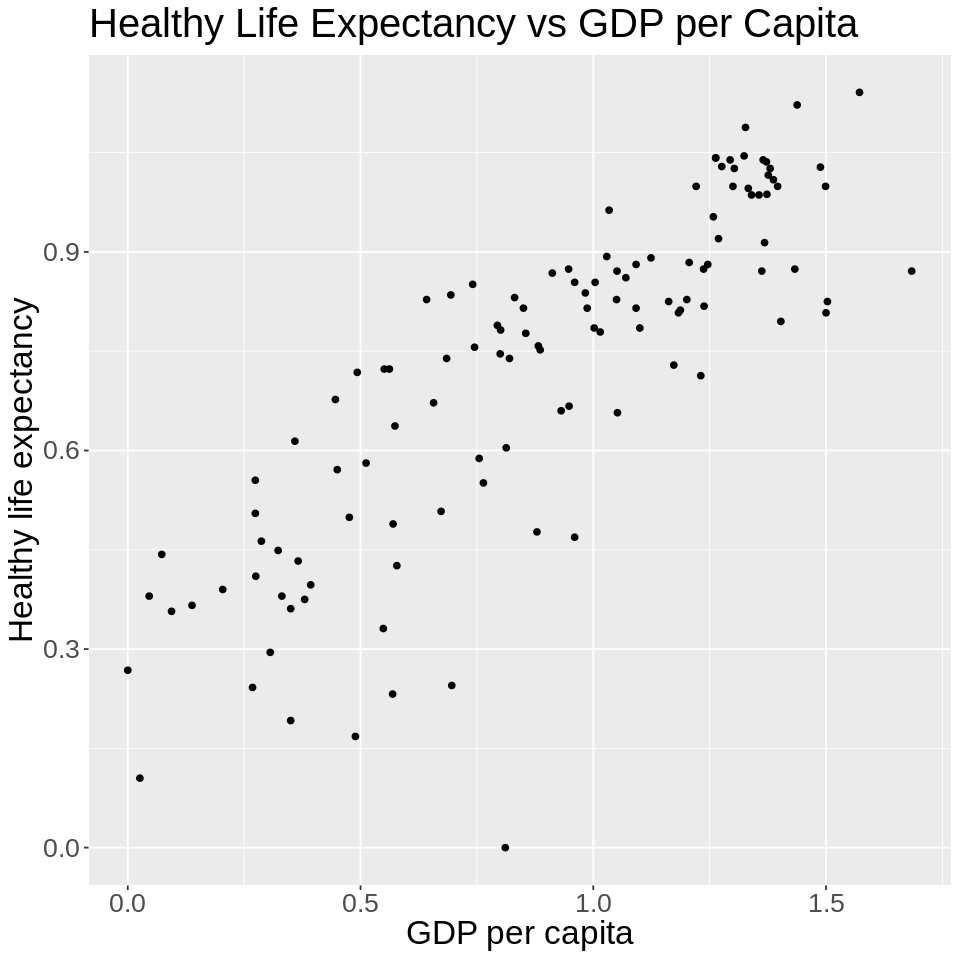

In [17]:
options(repr.plot.height = 8, repr.plot.width = 8)
GDP_health <- happiness_training %>%
    ggplot(aes(x = GDP.per.capita, y = Healthy.life.expectancy)) +
    geom_point() +
    labs(x = "GDP per capita", y = "Healthy life expectancy") +
    ggtitle("Healthy Life Expectancy vs GDP per Capita") +
    theme(text = element_text(size = 20))
GDP_health

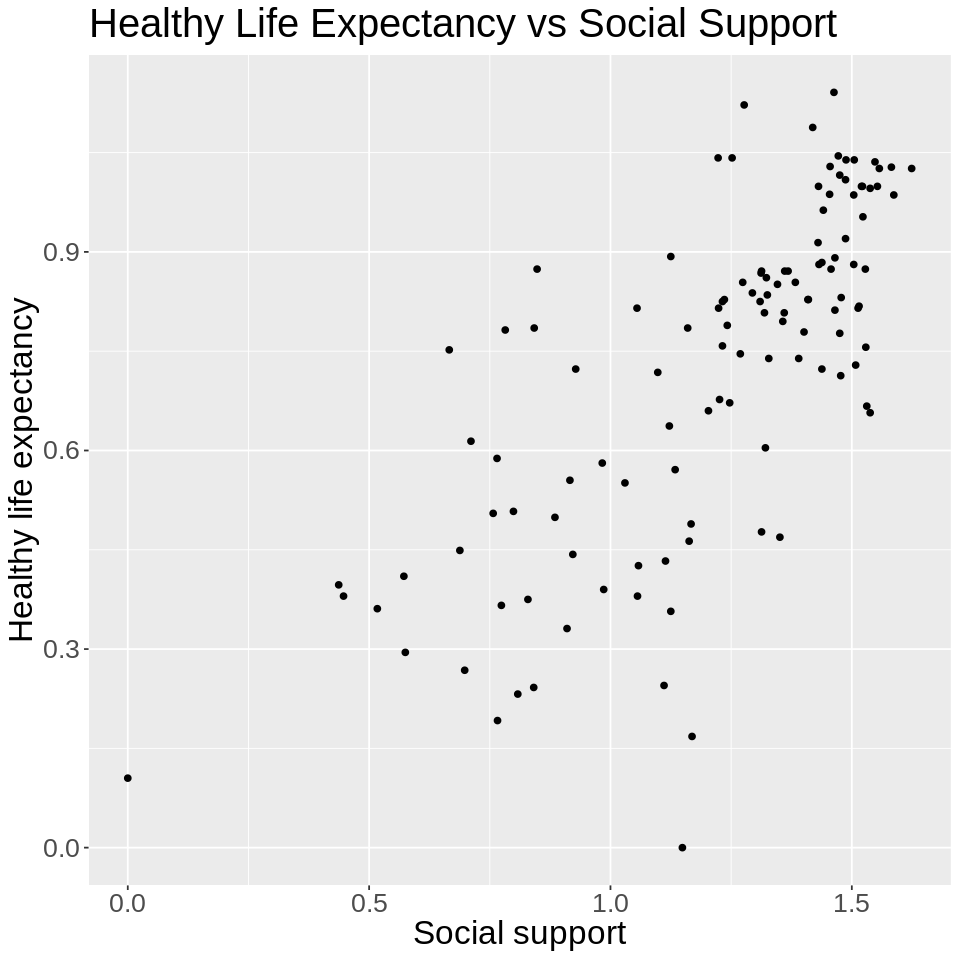

In [18]:
options(repr.plot.height = 8, repr.plot.width = 8)
social_support_health <- happiness_training %>%
    ggplot(aes(x = Social.support, y = Healthy.life.expectancy)) +
    geom_point() +
    labs(x = "Social support", y = "Healthy life expectancy") +
    ggtitle("Healthy Life Expectancy vs Social Support") +
    theme(text = element_text(size = 20))
social_support_health

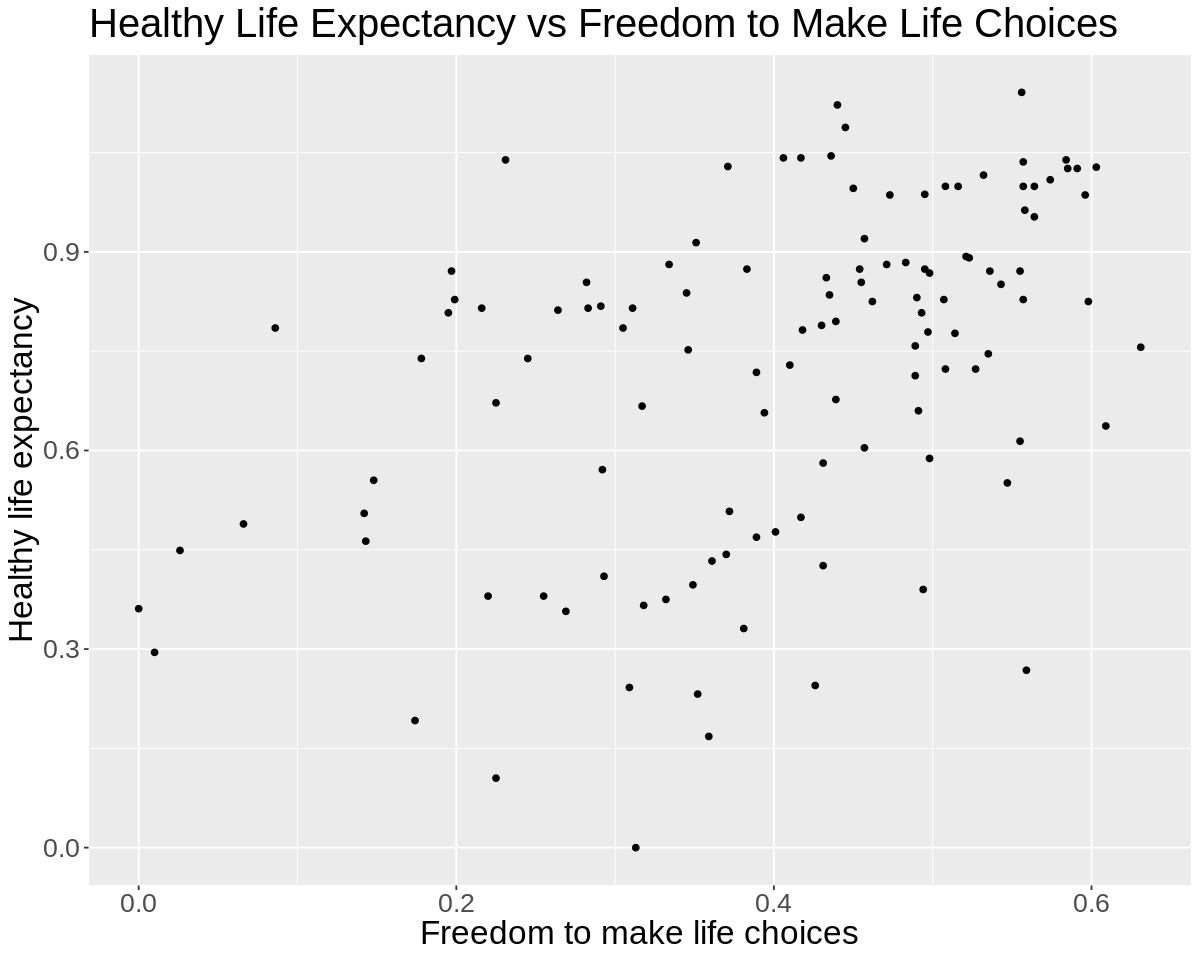

In [19]:
options(repr.plot.height = 8, repr.plot.width = 10)
freedom_health <- happiness_training %>%
    ggplot(aes(x = Freedom.to.make.life.choices, y = Healthy.life.expectancy)) +
    geom_point() +
    labs(x = "Freedom to make life choices", y = "Healthy life expectancy") +
    ggtitle("Healthy Life Expectancy vs Freedom to Make Life Choices") +
    theme(text = element_text(size = 20))
freedom_health

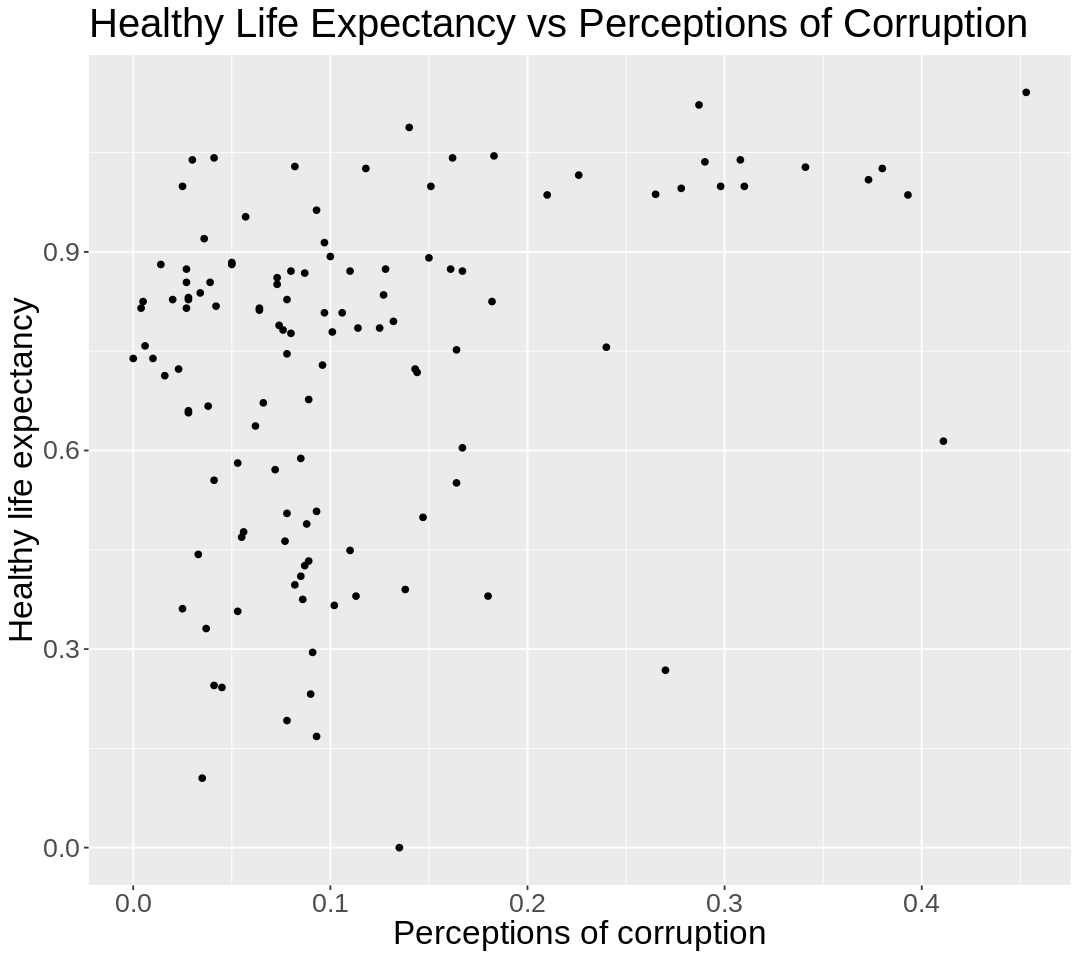

In [20]:
options(repr.plot.height = 8, repr.plot.width = 9)
corruption_health <- happiness_training %>%
    ggplot(aes(x = Perceptions.of.corruption, y = Healthy.life.expectancy)) +
    geom_point() +
    labs(x = "Perceptions of corruption", y = "Healthy life expectancy") +
    ggtitle("Healthy Life Expectancy vs Perceptions of Corruption") +
    theme(text = element_text(size = 20))
corruption_health

## Methods
To conduct our analysis, we first selected some potential predictor variables that may be correlated to HALE (target variable). If they are correlated, we may be able to use the predictor variables to predict HALE. The potential predictor variables we chose are GDP per capita, social support, freedom to make life choices, and perceptions of corruption. Next, we created scatter plots to visualize the relationships between the variables and assess whether the potential predictor variables are helpful in predicting HALE. As observed from the plots above, there is a positive linear relationship of moderate strength between HALE and GDP per capita; as GDP per capita increases, so does HALE. However, there is no clear relationship between HALE and the other predictor variables: social support, freedom, and perceptions of corruption. Therefore, we will use GDP per capita as our predictor variable.

To visualize the results, we will perform k-nearest neighbor regression using R. Specifically, we will split the dataset into a training and testing set, respectively. To choose the optimal k, we will use the training set to create a model specification for regression and perform a cross-validation with 5-folds to generate a table that will show how the root mean square prediction error (RMSPE) varies with different values of k. Based on the table, we will be able to determine the optimal k that gives the smallest RMSPE. Using the optimal k, we will assess the model’s RMSPE on the testing set to evaluate the quality of the regression, which will be shown in a summary table. Finally, predictions will be made on the training set, and we will create a scatter plot to visualize the predicted values using a line plotted over the data points, showing the correlation between the target and predictor variables. As a result, we could predict the HALE of a country/region given a particular GDP per capita level. 

## Expected outcomes and significance
Given that there exists a strong positive correlation between HALE and GDP per capita, we expect that HALE will be higher for a country whose GDP per capita is higher than that of another country. Using k nearest neighbors, our model could predict a country’s HALE given their GDP per capita. These findings could be useful to someone who is considering moving to different countries, allowing them to consider how a country’s GDP per capita may impact their life expectancy. Moreover, predicting a country’s HALE given GDP per capita begs the question: What can we do to increase healthy life expectancy in countries that have lower HALE?